# Kütüphaneleri İçe Aktar

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Veriyi Yükle ve Birleştir

In [7]:
import pandas as pd

# Her CSV dosyasını ayrı ayrı oku
df1 = pd.read_csv("accidents_2005_to_2007.csv", low_memory=False)
df2 = pd.read_csv("accidents_2009_to_2011.csv", low_memory=False)
df3 = pd.read_csv("accidents_2012_to_2014.csv", low_memory=False)

# Üç veri kümesini birleştir
df_all = pd.concat([df1, df2, df3], ignore_index=True)

# Veri setinin genel bilgisine bakalım
print(df_all.shape)
df_all.head()

(1504150, 33)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


# Temel Bilgiler & Eksik Veri Analizi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         1

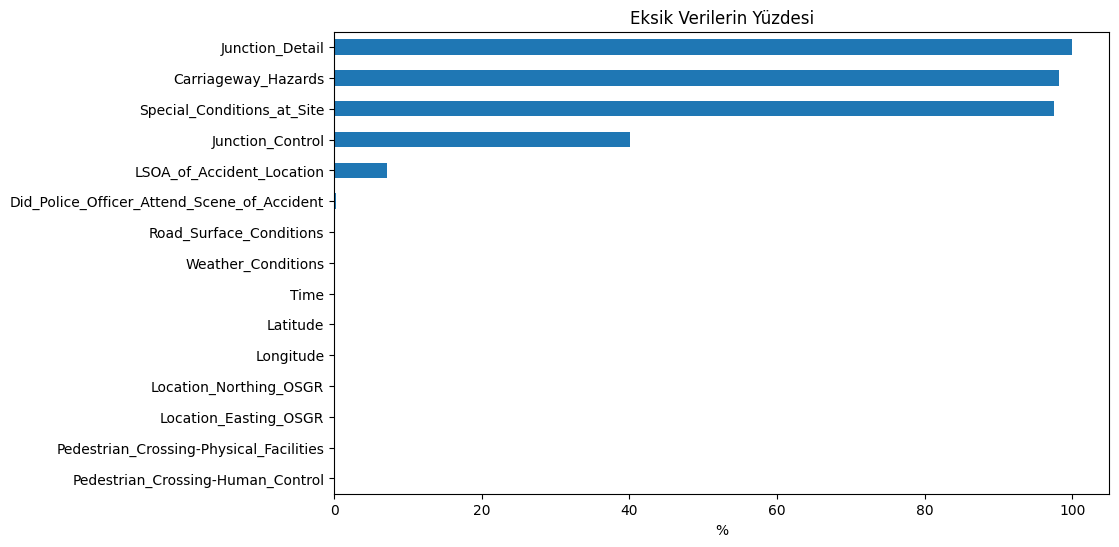

In [10]:
print(df_all.info())
print(df_all.isnull().sum().sort_values(ascending=False).head(20))

# Eksik veri yüzdesi görselleştirme
missing_percent = df_all.isnull().mean() * 100
missing_percent[missing_percent > 0].sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Eksik Verilerin Yüzdesi")
plt.xlabel("%")
plt.show()

# Zaman Dönüşümleri

In [11]:
df_all['Date'] = pd.to_datetime(df_all['Date'], errors='coerce')
df_all['Year'] = df_all['Date'].dt.year
df_all['Month'] = df_all['Date'].dt.month
df_all['DayOfWeek'] = df_all['Date'].dt.dayofweek

# Yıllara Göre Kaza Sayısı

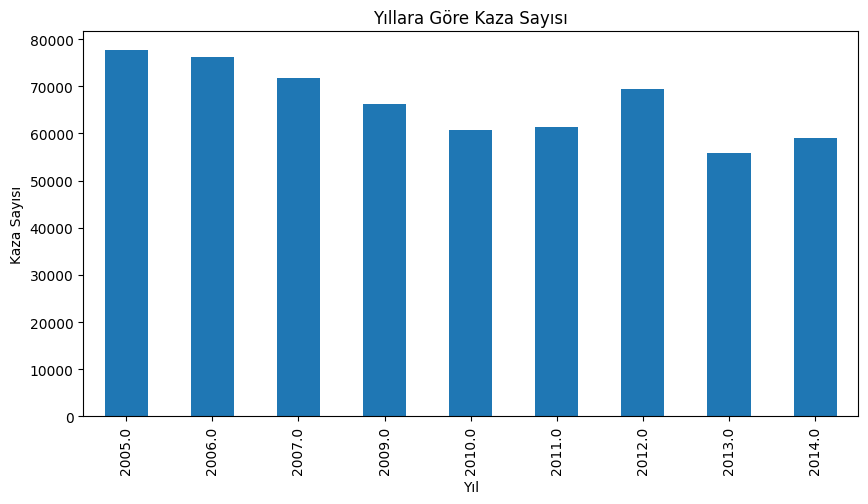

In [13]:
df_all['Year'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Yıllara Göre Kaza Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Kaza Sayısı")
plt.show()

# Kırsal – Kentsel Kaza Karşılaştırması

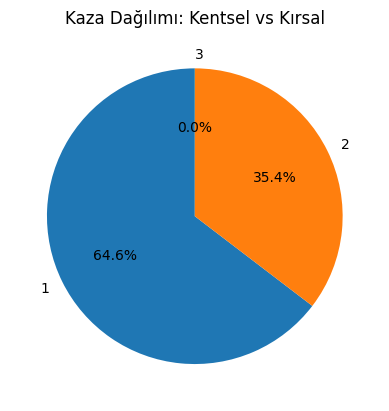

In [14]:
df_all['Urban_or_Rural_Area'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Kaza Dağılımı: Kentsel vs Kırsal")
plt.ylabel("")
plt.show()


# Günlere Göre Kaza Yoğunluğu

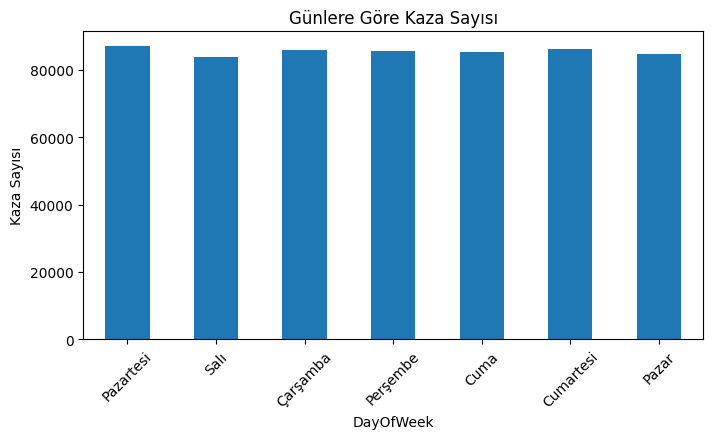

In [15]:
days = ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']
df_all['DayOfWeek'].value_counts().sort_index().plot(kind='bar', figsize=(8,4))
plt.title("Günlere Göre Kaza Sayısı")
plt.xticks(ticks=range(7), labels=days, rotation=45)
plt.ylabel("Kaza Sayısı")
plt.show()

# Hava Koşulları ile Kaza Sayısı

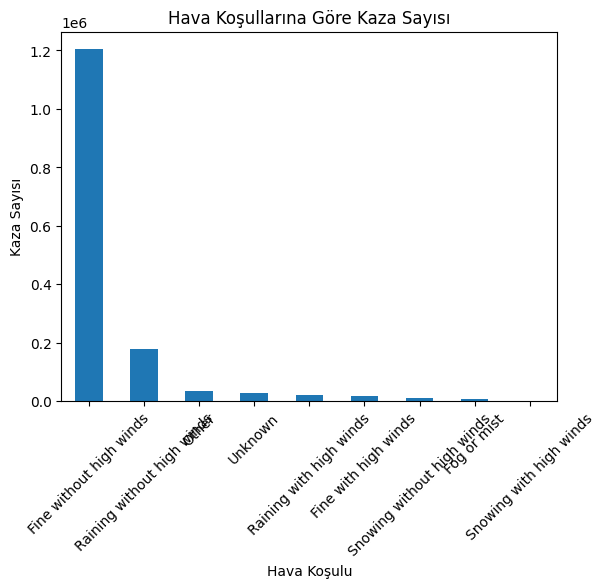

In [16]:
df_all['Weather_Conditions'].value_counts().head(10).plot(kind='bar')
plt.title("Hava Koşullarına Göre Kaza Sayısı")
plt.xlabel("Hava Koşulu")
plt.ylabel("Kaza Sayısı")
plt.xticks(rotation=45)
plt.show()


# Hız Sınırı vs Kaza

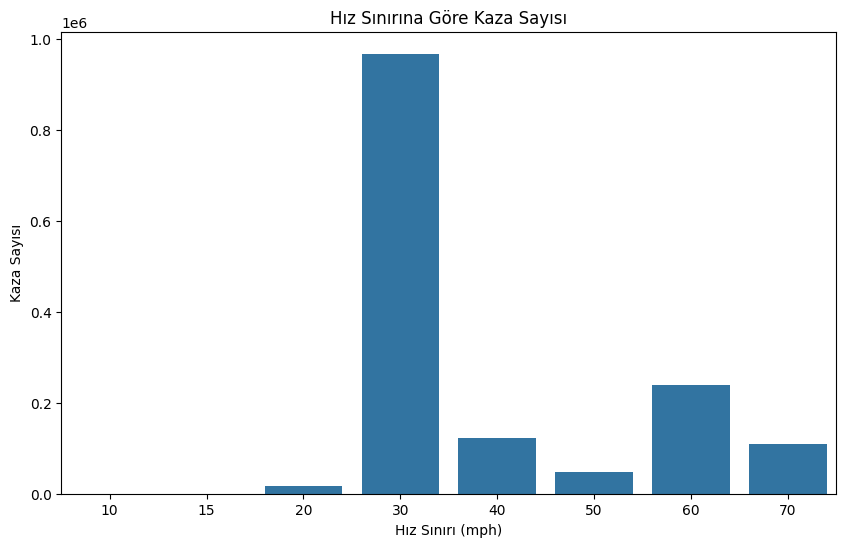

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_all[df_all['Speed_limit'] <= 70], x='Speed_limit', order=sorted(df_all['Speed_limit'].dropna().unique()))
plt.title("Hız Sınırına Göre Kaza Sayısı")
plt.xlabel("Hız Sınırı (mph)")
plt.ylabel("Kaza Sayısı")
plt.show()


# Korelasyon Analizi (Sayısal Değişkenler)

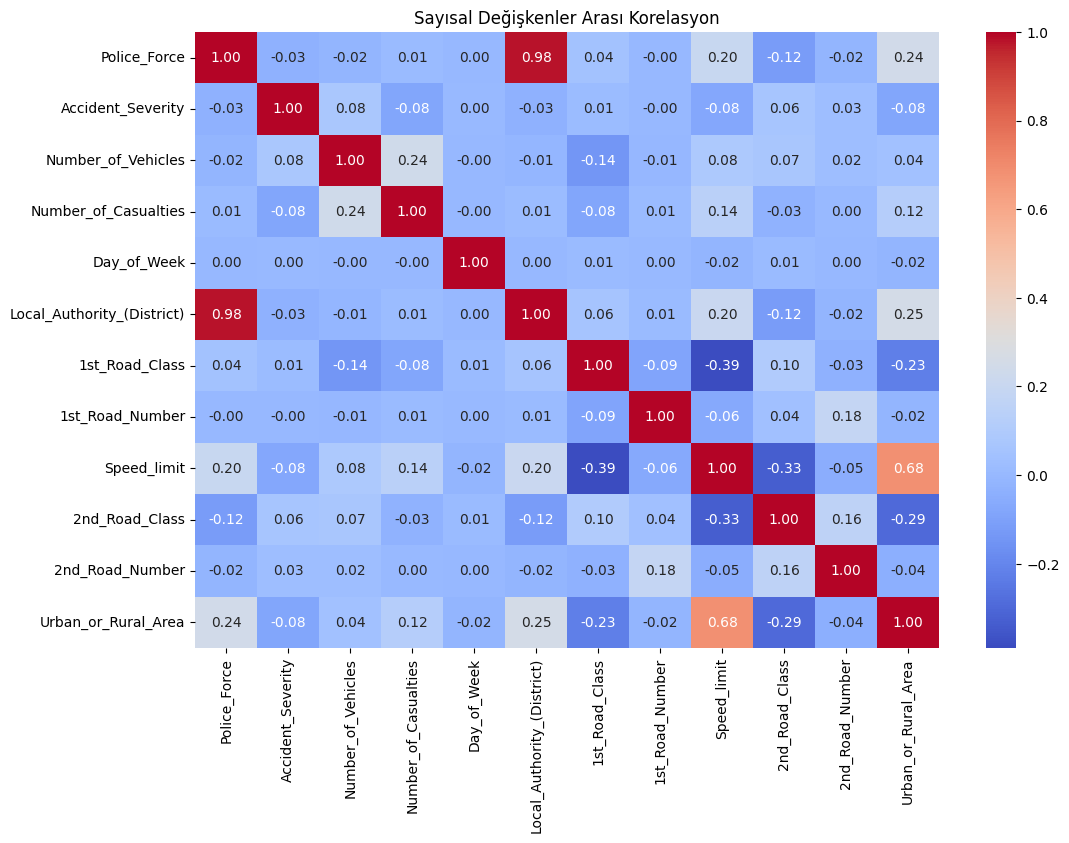

In [20]:
numeric_cols = df_all.select_dtypes(include=[np.number]).dropna(axis=1, how='any')
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Sayısal Değişkenler Arası Korelasyon")
plt.show()

# Regresyon ile Kaza Sayısı Tahmini (Zaman Serisi)

## Tarihi Dönüştür ve Grupla

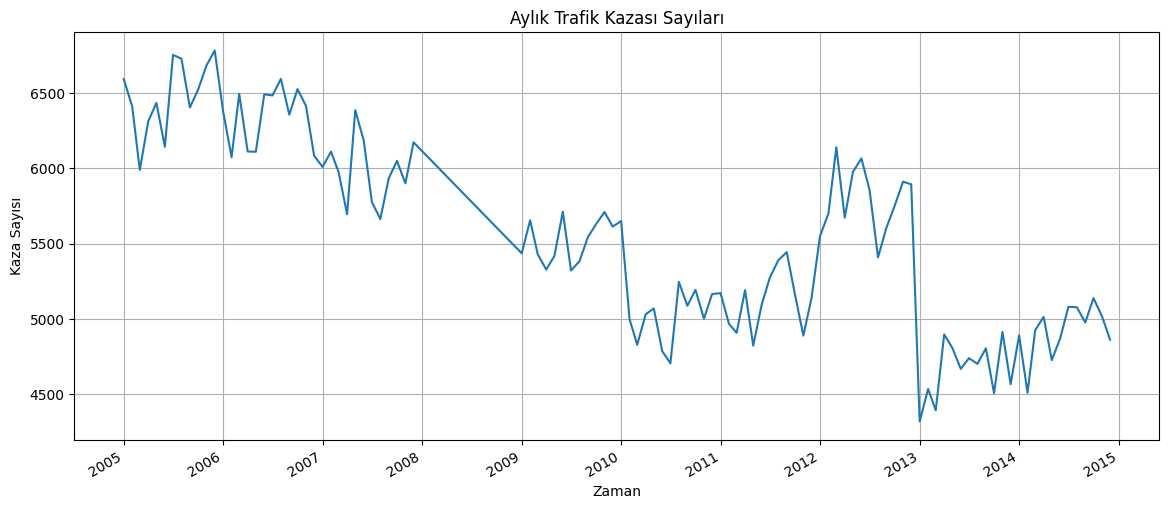

In [21]:
# Tarihi datetime formatına çevir
df_all['Date'] = pd.to_datetime(df_all['Date'], errors='coerce')

# Ay bazında gruplama
monthly_accidents = df_all.groupby(df_all['Date'].dt.to_period('M')).size()
monthly_accidents.index = monthly_accidents.index.to_timestamp()  # dönem → zaman damgasına

monthly_accidents.plot(figsize=(14,6))
plt.title("Aylık Trafik Kazası Sayıları")
plt.ylabel("Kaza Sayısı")
plt.xlabel("Zaman")
plt.grid(True)
plt.show()


## Train-Test Ayırma

In [22]:
train = monthly_accidents[:'2013-12']
test = monthly_accidents['2014-01':]


## Model: Basit Lineer Regresyon (dilersen ARIMA/Prophet de kullanılabilir)

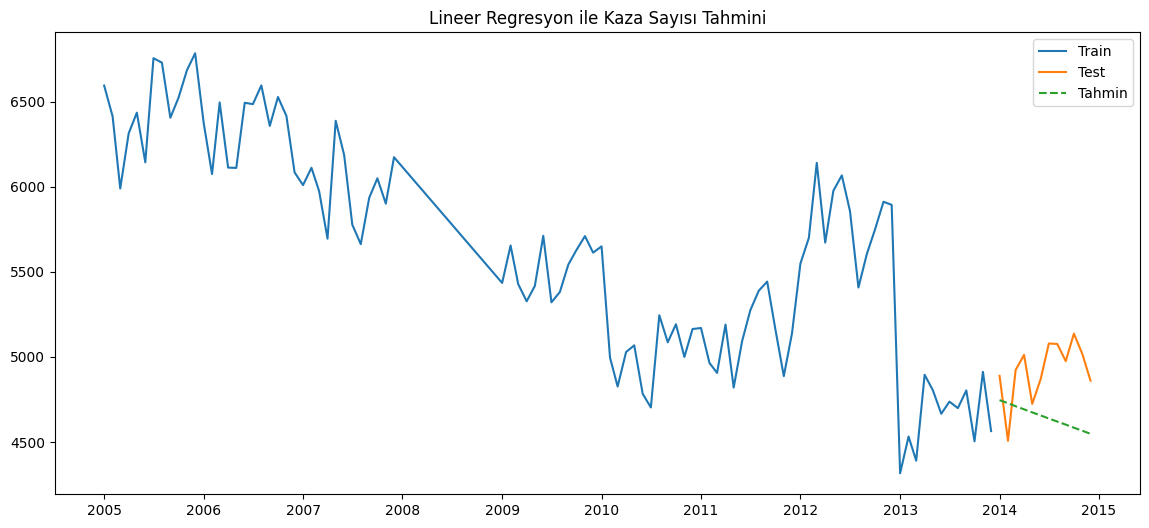

In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Zamanı sayıya çevir (model için)
train_dates = np.arange(len(train)).reshape(-1, 1)
test_dates = np.arange(len(train), len(train)+len(test)).reshape(-1, 1)

# Modeli eğit
lr = LinearRegression()
lr.fit(train_dates, train.values)

# Tahmin
preds = lr.predict(test_dates)

# Görselleştir
plt.figure(figsize=(14,6))
plt.plot(train.index, train.values, label="Train")
plt.plot(test.index, test.values, label="Test")
plt.plot(test.index, preds, label="Tahmin", linestyle='--')
plt.title("Lineer Regresyon ile Kaza Sayısı Tahmini")
plt.legend()
plt.show()


## Model Performansını Ölç (RMSE vs)

In [26]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test, preds)
rmse = np.sqrt(rmse)
print(f"RMSE: {rmse:.2f}")


RMSE: 343.25
